# Create the Reference Auto Encoder with same architecture as ClaDec but optimized for reconstruction only

In [ ]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent.parent.parent
os.chdir(home_dir)

In [1]:
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt

from src.common import get_optimizer
from src.mnist.data import get_mnist_train_test, get_mnist_labels_categorical
from src.mnist.perfectAE.file_names import SAVED_REFAE_PATH
from src.models import get_rafae

tf.random.set_seed(1234)

train_images, test_images = get_mnist_train_test()
train_labels_c, test_labels_c = get_mnist_labels_categorical()

## Auto Encoder with the 128 neuron Dense layer as code

In [2]:
model = get_rafae(add_dense=True)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               


2022-05-27 15:23:55.883486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 15:23:55.921499: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 15:23:55.921704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-27 15:23:55.922104: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 reshape (

In [3]:
optimizer = get_optimizer(learning_rate=0.00075)
mse = keras.losses.MeanSquaredError()
model.compile(optimizer, loss=mse)

In [4]:
history = model.fit(train_images, train_images, epochs=6)

Epoch 1/6


2022-05-27 15:24:00.216073: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303


1875/1875 [==============================] - 22s 9ms/step - loss: 0.0418
Epoch 2/6
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0152
Epoch 3/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0100
Epoch 4/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0080
Epoch 5/6
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0071
Epoch 6/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0065


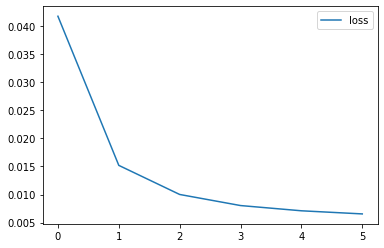

In [5]:
for k, vs in history.history.items():
    plt.plot(vs, label=k)
plt.legend()
plt.show()

In [6]:
model.evaluate(test_images, test_images)

313/313 [==============================] - 2s 5ms/step - loss: 0.0043


0.004286200739443302

In [7]:
model_path = SAVED_REFAE_PATH.joinpath('dense')
model.save(model_path)

2022-05-27 15:25:43.713148: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/perfectAE/refae/dense/assets


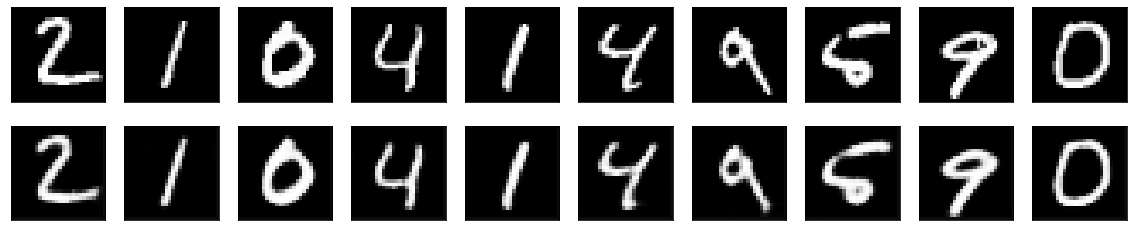

In [8]:
# https://blog.keras.io/building-autoencoders-in-keras.html
decoded_imgs = model.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## ## Auto Encoder with last conv layer as code

In [9]:
model = get_rafae(add_dense=False)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256 

In [10]:
optimizer = get_optimizer(learning_rate=0.00075)
mse = keras.losses.MeanSquaredError()
model.compile(optimizer, loss=mse)
history = model.fit(train_images, train_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0062
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0019
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0015
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0013
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0012
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0011
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 9.9608e-04
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 9.3903e-04
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 8.9239e-04
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/step - loss: 8.4922e-04


In [11]:
model.evaluate(test_images, test_images)

313/313 [==============================] - 2s 5ms/step - loss: 8.1013e-04


0.0008101315470412374

In [12]:
model_path = SAVED_REFAE_PATH.joinpath('conv')
model.save(model_path)

INFO:tensorflow:Assets written to: /home/tom/Uni_Dev/cladec-mnist/saved-models/perfectAE/refae/conv/assets


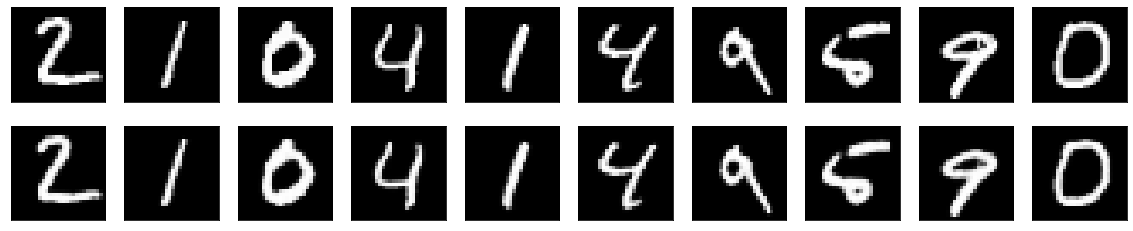

In [13]:
# https://blog.keras.io/building-autoencoders-in-keras.html
decoded_imgs = model.predict(test_images)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()